Bartłomiej Guś nr albumu: 297415

Praca domowa nr 1

In [5]:
def lista_liczba_pierwsza_czy_nie(argumenty):
    x = []
    ktore_miejsce = 0
    for a in argumenty:
        x.append(True)
        for b in range (2,a):
            if a%b == 0 :
                x[ktore_miejsce] = False
                break
        ktore_miejsce += 1
    return x

lista_wartosci = list(range(1,12))

lista_T_F = lista_liczba_pierwsza_czy_nie(lista_wartosci)

print(lista_wartosci)
print(lista_T_F)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[True, True, True, False, True, False, True, False, False, False, True]


Praca domowa nr 1 - zmniejszenie linijek

In [6]:
lista_wartosci2 = list(range(1,12))

lista_T_F2 = lambda x: [False if any(a%b==0 for b in range(2,a)) else True for a in x]

print(lista_wartosci2)
print(lista_T_F2(lista_wartosci2))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
[True, True, True, False, True, False, True, False, False, False, True]


Praca domowa nr 2

In [1]:
class Osoba():

    def __init__(self,wiek,nazwisko):
        self.wiek = wiek
        self.nazwisko = nazwisko

    def key(self):
        return self.wiek


print("Lista osób nieposortowna:")
lista_osob = [Osoba(22,"Kowalski"), Osoba(55,"Nowak"), Osoba(41,"Walczyk"), Osoba(12,"Hurkacz"),Osoba(15,"Świątek")]
print(*[f"Mój wiek to:{a.wiek}, a moje nazwisko to: {a.nazwisko}" for a in lista_osob],sep='\n')

print("\nLista osób posortowna:")
lista_osob.sort(key = Osoba.key)
print(*[f"Mój wiek to:{a.wiek}, a moje nazwisko to: {a.nazwisko}" for a in lista_osob],sep='\n')

Lista osób nieposortowna:
Mój wiek to:22, a moje nazwisko to: Kowalski
Mój wiek to:55, a moje nazwisko to: Nowak
Mój wiek to:41, a moje nazwisko to: Walczyk
Mój wiek to:12, a moje nazwisko to: Hurkacz
Mój wiek to:15, a moje nazwisko to: Świątek

Lista osób posortowna:
Mój wiek to:12, a moje nazwisko to: Hurkacz
Mój wiek to:15, a moje nazwisko to: Świątek
Mój wiek to:22, a moje nazwisko to: Kowalski
Mój wiek to:41, a moje nazwisko to: Walczyk
Mój wiek to:55, a moje nazwisko to: Nowak


Praca domowa nr 3

In [1]:
def obliczanie_sumy_pieciu_liczb(ile_liczb = 5):
    suma = 0
    for i in range(0,ile_liczb):
        wartosc = int(input("Podaj wartość: "+ str(i+1) + " liczby"))
        if wartosc <= 0:
            raise Exception('Liczby mają być naturalne! Wprowadzona liczba to: {}'.format(wartosc))
        suma = suma + wartosc

    return suma

try:
    ile_bedzie_liczb_do_sumowania = 1

    if ile_bedzie_liczb_do_sumowania <= 0:
        raise Exception('Liczba sumowanych wartości musi być liczbą DODATNIĄ! Wprowadzona wartość to: {}'.format(ile_bedzie_liczb_do_sumowania))

    suma = obliczanie_sumy_pieciu_liczb(ile_bedzie_liczb_do_sumowania)
    print("Wartość sumy to: {}".format(suma))
except TypeError:
    print("ERROR: Liczba sumowanych wartości musi być liczbą!")
except ValueError as e:
    print("ERROR: Wartości muszą być liczbami naturalnymi!")
except Exception as e:
    print("ERROR: ",e)

ERROR: Wartości muszą być liczbami naturalnymi!


Praca domowa nr 4

In [8]:
import cv2 as cv
import numpy as np

film = cv.VideoCapture(0)

wysokosc = int(film.get(3))
szerokosc = int(film.get(4))

zapis = cv.VideoWriter('C:/Users/barte/Desktop/StudiaMGR/PHYTON/nagranie.avi', cv.VideoWriter_fourcc('M','J','P','G'), 30, (wysokosc,szerokosc))

zapis_tylko_czerwony = cv.VideoWriter('C:/Users/barte/Desktop/StudiaMGR/PHYTON/nagranie_tylko_czerwony.avi', cv.VideoWriter_fourcc('M','J','P','G'), 30, (wysokosc,szerokosc))

while(film.isOpened()):

    ret, ramka = film.read()

    zapis.write(ramka)

    cv.imshow('Film', ramka)

    ramka = cv.medianBlur(ramka,5)

    ramka_hsv = cv.cvtColor(ramka, cv.COLOR_BGR2HSV)
    dolna_wartosc_czerwonego = np.array([170,50,50])
    gorna_wartosc_czerwonego = np.array([180,255,255])

    tylko_czerwony = cv.inRange(ramka_hsv, dolna_wartosc_czerwonego, gorna_wartosc_czerwonego)

    tylko_czerwony_BGR = cv.cvtColor(tylko_czerwony,cv.COLOR_GRAY2BGR)
    tylko_czerwony_HSV = cv.cvtColor(tylko_czerwony_BGR, cv.COLOR_BGR2HSV)
    

    zapis_tylko_czerwony.write(tylko_czerwony_HSV)

    cv.imshow('Film tylko czerwony', tylko_czerwony_HSV)

    key = cv.waitKey(1)
    if  key == 27:
        break

film.release()
zapis.release()
zapis_tylko_czerwony.release()
cv.destroyAllWindows()

Praca domowa nr 5

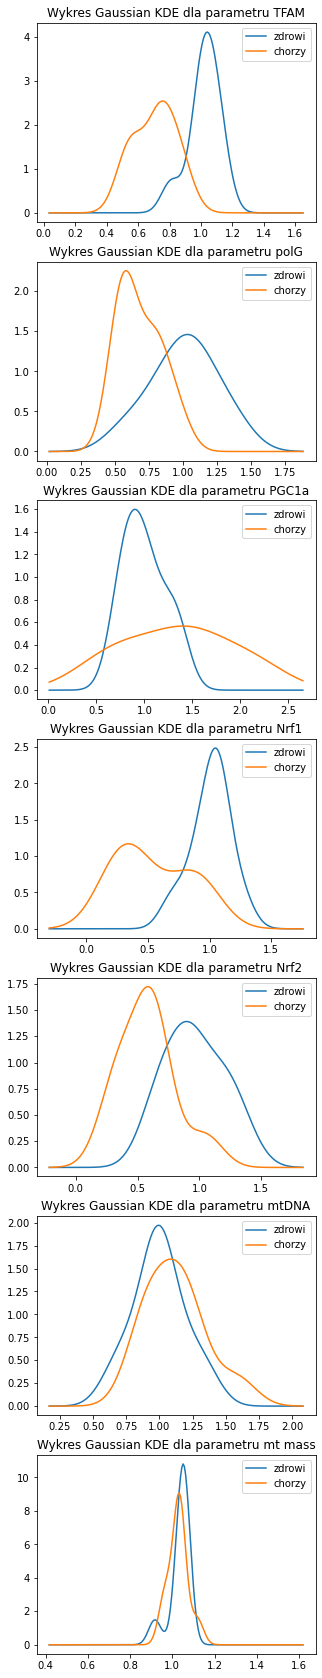

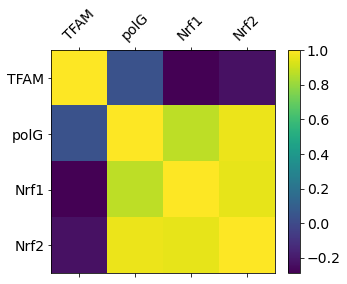

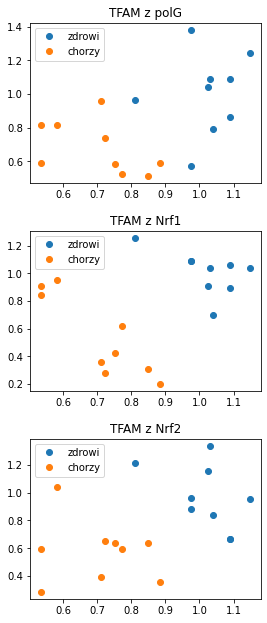

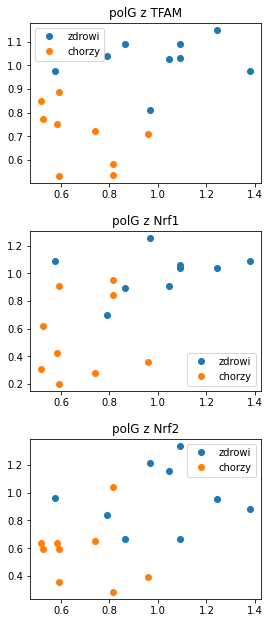

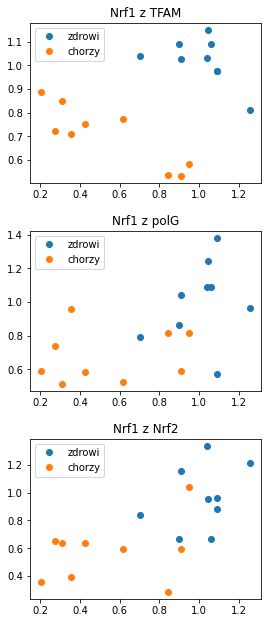

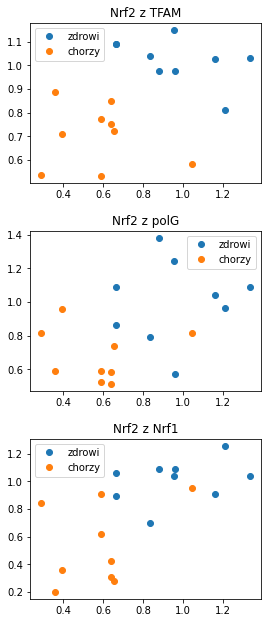

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gaussian_kde
from reportlab.pdfgen import canvas
from reportlab.graphics import renderPDF
from svglib.svglib import svg2rlg
import io

df = pd.read_excel("biogeneza.xlsx",sheet_name="Arkusz1")

#Podział na chorych i zdrowych
df_zdrowi = df[df["wynik"]==0]
df_chorzy = df[df["wynik"]==1]

fig_1, axs_1 = plt.subplots(7,1)
fig_1.set_size_inches(5, 30)

nazwy_kolumn = df.columns.values.tolist()
nazwy_kolumn.pop(0)
nazwy_kolumn.pop(len(nazwy_kolumn)-1)

# Ocena najwazniejszych parametrow
for z in range(0,7):
    min_wartosc = df[nazwy_kolumn[z]].min()
    max_wartosc = df[nazwy_kolumn[z]].max()

    wartosci = np.linspace(min_wartosc-0.5, max_wartosc+0.5, 200)
    kde_zdrowi = gaussian_kde(dataset=df_zdrowi[nazwy_kolumn[z]])
    kde_chorzy = gaussian_kde(dataset=df_chorzy[nazwy_kolumn[z]])
    g_kde_values_zdrowi = kde_zdrowi(wartosci)
    g_kde_values_chorzy = kde_chorzy(wartosci)

    axs_1[z].plot(wartosci,g_kde_values_zdrowi,label = "zdrowi")
    axs_1[z].plot(wartosci,g_kde_values_chorzy,label = "chorzy")
    axs_1[z].set_title("Wykres Gaussian KDE dla parametru " + nazwy_kolumn[z])
    axs_1[z].legend(loc="best")

imgdata_fig1 = io.BytesIO()
fig_1.savefig(imgdata_fig1, format='svg')
imgdata_fig1.seek(0) 
rysunek_fig1 = svg2rlg(imgdata_fig1)

df_najistoniejsze = df.copy()

df_najistoniejsze.drop("nazwa parametru",inplace=True,axis = 1)
df_najistoniejsze.drop("PGC1a",inplace=True,axis = 1)
df_najistoniejsze.drop("mtDNA",inplace=True,axis = 1)
df_najistoniejsze.drop("mt mass",inplace=True,axis = 1)
df_najistoniejsze.drop("wynik",inplace=True,axis = 1)

#Wykres korelacji
fig_macierz = plt.figure(figsize=(5, 4))
plt.matshow(df_najistoniejsze[1:5].corr(), fignum=fig_macierz.number)
plt.xticks(range(df_najistoniejsze.shape[1]), labels = df_najistoniejsze.columns, fontsize=14, rotation=45)
plt.yticks(range(df_najistoniejsze.shape[1]), labels = df_najistoniejsze.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)

imgdata_fig2 = io.BytesIO()
fig_macierz.savefig(imgdata_fig2, format='svg')
imgdata_fig2.seek(0) 
rysunek_fig2 = svg2rlg(imgdata_fig2)

nazwy_kolumn_najistotniejsze = df_najistoniejsze.columns.values.tolist()

rysunek_fig3 = []

#Wykres par
for i in range(0,len(nazwy_kolumn_najistotniejsze)):

    aktualnie_sprawdzany_parametr = nazwy_kolumn_najistotniejsze[i]
    pozostale_nazwy_kolumn = nazwy_kolumn_najistotniejsze.copy()
    pozostale_nazwy_kolumn.pop(i)

    fig_2, axs_2 = plt.subplots(3,1)
    fig_2.set_size_inches(4, 10)

    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.3, 
                    hspace=0.3)
    for j in range(0,3):
        axs_2[j].plot(df_zdrowi[aktualnie_sprawdzany_parametr],df_zdrowi[pozostale_nazwy_kolumn[j]],'o',label = "zdrowi")
        axs_2[j].plot(df_chorzy[aktualnie_sprawdzany_parametr],df_chorzy[pozostale_nazwy_kolumn[j]],'o',label = "chorzy")
        axs_2[j].set_title(aktualnie_sprawdzany_parametr+" z "+pozostale_nazwy_kolumn[j])
        axs_2[j].legend(loc="best")

    imgdata_fig_pom = io.BytesIO()
    fig_2.savefig(imgdata_fig_pom, format='svg')
    imgdata_fig_pom.seek(0) 
    rysunek_fig_pom = svg2rlg(imgdata_fig_pom)

    rysunek_fig3.append(rysunek_fig_pom)


#Raport
nazwa_pliku = 'BartlomiejGus.pdf'
tytul_dokumentu = 'Praca domowa - Bartlomiej Gus'
podtytul = ['Okreslenie najbardziej istotnych parametrow','Wykres korelacji','Wykres par parametrow']
komentarz = [
    'Jako najbardziej istotne parametry na podstawie powyzszych wzorow wybralem: TFAM, polG, Nrf1,Nrf2.',
    'Na podstawie powyzszego wykresu widac, ze najbardziej skorelowane wartosci to: ',
    'Nrf1 i Nrf2 oraz Nrf1 i polG a takze Nrf2 i polG.'
]

image = 'out.png'

pdf = canvas.Canvas(nazwa_pliku)
pdf.setTitle(tytul_dokumentu)
pdf.setFont("Courier-Bold", 32)
pdf.drawCentredString(300, 750, tytul_dokumentu)

pdf.setFont("Courier-Bold", 20)
pdf.drawCentredString(290, 690, podtytul[0])

renderPDF.draw(rysunek_fig1,pdf, 50, -1800)
pdf.showPage()

renderPDF.draw(rysunek_fig1,pdf, 50, -960)
pdf.setStrokeColorRGB(255,255,255)
pdf.setFillColorRGB(255,255,255)
pdf.rect(0,0,600,250, fill =1)
pdf.showPage()

renderPDF.draw(rysunek_fig1,pdf, 50, -370)
pdf.setStrokeColorRGB(255,255,255)
pdf.setFillColorRGB(255,255,255)
pdf.rect(0,0,600,240, fill =1)
pdf.showPage()

renderPDF.draw(rysunek_fig1,pdf, 50, 230)
pdf.setFont("Courier", 9)
pdf.drawCentredString(290,510,komentarz[0])

pdf.setFont("Courier-Bold", 20)
pdf.drawCentredString(290,480,podtytul[1])
renderPDF.draw(rysunek_fig2,pdf, 50, 80)

pdf.setFont("Courier", 9)
pdf.drawCentredString(290,90,komentarz[1])
pdf.setFont("Courier", 9)
pdf.drawCentredString(290,75,komentarz[2])
pdf.showPage()

pdf.setFont("Courier-Bold", 20)
pdf.drawCentredString(290, 800, podtytul[2])
renderPDF.draw(rysunek_fig3[0],pdf, 100, -45)
pdf.showPage()

renderPDF.draw(rysunek_fig3[1],pdf, 100, -45)
pdf.showPage()

renderPDF.draw(rysunek_fig3[2],pdf, 100, -45)
pdf.showPage()

renderPDF.draw(rysunek_fig3[3],pdf, 100, -45)
pdf.showPage()

pdf.save()
